# Exercise 2.1 - Unsupervised Learning Algorithms

This script contains the following parts:

1. Importing Libraries and Data
2. Data Checks, Wrangling, and Scaling
3. Dendrograms
4. Principal Component Analysis

## 1. Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import operator

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [2]:
# Set path

path = r'C:\Users\kyles\CareerFoundary\Machine Learning\Achievement 2'

In [3]:
# Import original weather data

df_weather = pd.read_csv(os.path.join(path, '02 Data', 'ClimateWins_Dataset_original.csv'))

# Check

df_weather

DATE  MONTH  BASEL_cloud_cover  BASEL_wind_speed  BASEL_humidity  \
0      19600101      1                  7               2.1            0.85   
1      19600102      1                  6               2.1            0.84   
2      19600103      1                  8               2.1            0.90   
3      19600104      1                  3               2.1            0.92   
4      19600105      1                  6               2.1            0.95   
...         ...    ...                ...               ...             ...   
22945  20221027     10                  1               2.1            0.79   
22946  20221028     10                  6               2.1            0.77   
22947  20221029     10                  4               2.1            0.76   
22948  20221030     10                  5               2.1            0.80   
22949  20221031     10                  5               2.1            0.84   

       BASEL_pressure  BASEL_global_radiation  BASEL_precipitation  \
0              1.0180                    0.32                 0.09   
1              1.0180                    0.36                 1.05   
2              1.0180                    0.18                 0.30   
3              1.0180                    0.58                 0.00   
4              1.0180                    0.65                 0.14   
...               ...                     ...                  ...   
22945          1.0248                    1.34                 0.22   
22946          1.0244                    1.34                 0.22   
22947          1.0227                    1.34                 0.22   
22948          1.0212                    1.34                 0.22   
22949          1.0193                    1.34                 0.22   

       BASEL_snow_depth  BASEL_sunshine  ...  VALENTIA_cloud_cover  \
0                     0             0.7  ...                     5   
1                     0             1.1  ...                     7   
2                     0             0.0  ...                     7   
3                     0             4.1  ...                     7   
4                     0             5.4  ...                     3   
...                 ...             ...  ...                   ...   
22945                 0             7.7  ...                     5   
22946                 0             5.4  ...                     5   
22947                 0             6.1  ...                     5   
22948                 0             5.8  ...                     5   
22949                 0             3.2  ...                     5   

       VALENTIA_humidity  VALENTIA_pressure  VALENTIA_global_radiation  \
0                   0.88             1.0003                       0.45   
1                   0.91             1.0007                       0.25   
2                   0.91             1.0096                       0.17   
3                   0.86             1.0184                       0.13   
4                   0.80             1.0328                       0.46   
...                  ...                ...                        ...   
22945               0.82             1.0142                       1.13   
22946               0.82             1.0142                       1.13   
22947               0.82             1.0142                       1.13   
22948               0.82             1.0142                       1.13   
22949               0.82             1.0142                       1.13   

       VALENTIA_precipitation  VALENTIA_snow_depth  VALENTIA_sunshine  \
0                        0.34                    0                4.7   
1                        0.84                    0                0.7   
2                        0.08                    0                0.1   
3                        0.98                    0                0.0   
4                        0.00                    0                5.7   
...                       ...                  ...   

## 2. Data Checks, Wrangling, and Scaling

### 2.1 - Checks

In [4]:
# First - Check for missing values
rows_with_missing_data = df_weather[df_weather.isnull().any(axis=1)]
rows_with_missing_data

Empty DataFrame
Columns: [DATE, MONTH, BASEL_cloud_cover, BASEL_wind_speed, BASEL_humidity, BASEL_pressure, BASEL_global_radiation, BASEL_precipitation, BASEL_snow_depth, BASEL_sunshine, BASEL_temp_mean, BASEL_temp_min, BASEL_temp_max, BELGRADE_cloud_cover, BELGRADE_humidity, BELGRADE_pressure, BELGRADE_global_radiation, BELGRADE_precipitation, BELGRADE_sunshine, BELGRADE_temp_mean, BELGRADE_temp_min, BELGRADE_temp_max, BUDAPEST_cloud_cover, BUDAPEST_humidity, BUDAPEST_pressure, BUDAPEST_global_radiation, BUDAPEST_precipitation, BUDAPEST_sunshine, BUDAPEST_temp_mean, BUDAPEST_temp_min, BUDAPEST_temp_max, DEBILT_cloud_cover, DEBILT_wind_speed, DEBILT_humidity, DEBILT_pressure, DEBILT_global_radiation, DEBILT_precipitation, DEBILT_sunshine, DEBILT_temp_mean, DEBILT_temp_min, DEBILT_temp_max, DUSSELDORF_cloud_cover, DUSSELDORF_wind_speed, DUSSELDORF_humidity, DUSSELDORF_pressure, DUSSELDORF_global_radiation, DUSSELDORF_precipitation, DUSSELDORF_snow_depth, DUSSELDORF_sunshine, DUSSELDORF_temp_mean, DUSSELDORF_temp_min, DUSSELDORF_temp_max, GDANSK_cloud_cover, GDANSK_humidity, GDANSK_precipitation, GDANSK_snow_depth, GDANSK_temp_mean, GDANSK_temp_min, GDANSK_temp_max, HEATHROW_cloud_cover, HEATHROW_humidity, HEATHROW_pressure, HEATHROW_global_radiation, HEATHROW_precipitation, HEATHROW_snow_depth, HEATHROW_sunshine, HEATHROW_temp_mean, HEATHROW_temp_min, HEATHROW_temp_max, KASSEL_wind_speed, KASSEL_humidity, KASSEL_pressure, KASSEL_global_radiation, KASSEL_precipitation, KASSEL_sunshine, KASSEL_temp_mean, KASSEL_temp_min, KASSEL_temp_max, LJUBLJANA_cloud_cover, LJUBLJANA_wind_speed, LJUBLJANA_humidity, LJUBLJANA_pressure, LJUBLJANA_global_radiation, LJUBLJANA_precipitation, LJUBLJANA_sunshine, LJUBLJANA_temp_mean, LJUBLJANA_temp_min, LJUBLJANA_temp_max, MAASTRICHT_cloud_cover, MAASTRICHT_wind_speed, MAASTRICHT_humidity, MAASTRICHT_pressure, MAASTRICHT_global_radiation, MAASTRICHT_precipitation, MAASTRICHT_sunshine, MAASTRICHT_temp_mean, MAASTRICHT_temp_min, MAASTRICHT_temp_max, MADRID_cloud_cover, MADRID_wind_speed, ...]
Index: []

[0 rows x 170 columns]

In [5]:
# Check for duplicates
duplicate_rows = df_weather[df_weather.duplicated()]
duplicate_rows

Empty DataFrame
Columns: [DATE, MONTH, BASEL_cloud_cover, BASEL_wind_speed, BASEL_humidity, BASEL_pressure, BASEL_global_radiation, BASEL_precipitation, BASEL_snow_depth, BASEL_sunshine, BASEL_temp_mean, BASEL_temp_min, BASEL_temp_max, BELGRADE_cloud_cover, BELGRADE_humidity, BELGRADE_pressure, BELGRADE_global_radiation, BELGRADE_precipitation, BELGRADE_sunshine, BELGRADE_temp_mean, BELGRADE_temp_min, BELGRADE_temp_max, BUDAPEST_cloud_cover, BUDAPEST_humidity, BUDAPEST_pressure, BUDAPEST_global_radiation, BUDAPEST_precipitation, BUDAPEST_sunshine, BUDAPEST_temp_mean, BUDAPEST_temp_min, BUDAPEST_temp_max, DEBILT_cloud_cover, DEBILT_wind_speed, DEBILT_humidity, DEBILT_pressure, DEBILT_global_radiation, DEBILT_precipitation, DEBILT_sunshine, DEBILT_temp_mean, DEBILT_temp_min, DEBILT_temp_max, DUSSELDORF_cloud_cover, DUSSELDORF_wind_speed, DUSSELDORF_humidity, DUSSELDORF_pressure, DUSSELDORF_global_radiation, DUSSELDORF_precipitation, DUSSELDORF_snow_depth, DUSSELDORF_sunshine, DUSSELDORF_temp_mean, DUSSELDORF_temp_min, DUSSELDORF_temp_max, GDANSK_cloud_cover, GDANSK_humidity, GDANSK_precipitation, GDANSK_snow_depth, GDANSK_temp_mean, GDANSK_temp_min, GDANSK_temp_max, HEATHROW_cloud_cover, HEATHROW_humidity, HEATHROW_pressure, HEATHROW_global_radiation, HEATHROW_precipitation, HEATHROW_snow_depth, HEATHROW_sunshine, HEATHROW_temp_mean, HEATHROW_temp_min, HEATHROW_temp_max, KASSEL_wind_speed, KASSEL_humidity, KASSEL_pressure, KASSEL_global_radiation, KASSEL_precipitation, KASSEL_sunshine, KASSEL_temp_mean, KASSEL_temp_min, KASSEL_temp_max, LJUBLJANA_cloud_cover, LJUBLJANA_wind_speed, LJUBLJANA_humidity, LJUBLJANA_pressure, LJUBLJANA_global_radiation, LJUBLJANA_precipitation, LJUBLJANA_sunshine, LJUBLJANA_temp_mean, LJUBLJANA_temp_min, LJUBLJANA_temp_max, MAASTRICHT_cloud_cover, MAASTRICHT_wind_speed, MAASTRICHT_humidity, MAASTRICHT_pressure, MAASTRICHT_global_radiation, MAASTRICHT_precipitation, MAASTRICHT_sunshine, MAASTRICHT_temp_mean, MAASTRICHT_temp_min, MAASTRICHT_temp_max, MADRID_cloud_cover, MADRID_wind_speed, ...]
Index: []

[0 rows x 170 columns]

Other checks could be made, like checking for datatype consistency, but let's say for this exercise that everything is fine 

### 2.2 - Wrangling

In [6]:
# Limit data to look at the decade 2000
df_2000 = df_weather[df_weather['DATE'].astype(str).str.contains('2000')] # swap year / year range here
df_2000

DATE  MONTH  BASEL_cloud_cover  BASEL_wind_speed  BASEL_humidity  \
14610  20000101      1                  8               2.1            0.89   
14611  20000102      1                  8               2.1            0.87   
14612  20000103      1                  5               2.1            0.81   
14613  20000104      1                  7               2.1            0.79   
14614  20000105      1                  5               2.1            0.90   
...         ...    ...                ...               ...             ...   
14971  20001227     12                  5               2.1            0.83   
14972  20001228     12                  6               2.1            0.80   
14973  20001229     12                  8               2.1            0.81   
14974  20001230     12                  4               2.1            0.77   
14975  20001231     12                  3               2.1            0.76   

       BASEL_pressure  BASEL_global_radiation  BASEL_precipitation  \
14610          1.0286                    0.20                 0.03   
14611          1.0318                    0.25                 0.00   
14612          1.0314                    0.50                 0.00   
14613          1.0262                    0.63                 0.35   
14614          1.0246                    0.51                 0.07   
...               ...                     ...                  ...   
14971          0.9921                    0.37                 0.04   
14972          1.0002                    0.17                 0.01   
14973          1.0021                    0.16                 0.17   
14974          1.0069                    0.43                 0.01   
14975          1.0188                    0.59                 0.00   

       BASEL_snow_depth  BASEL_sunshine  ...  VALENTIA_cloud_cover  \
14610                 0             0.0  ...                     6   
14611                 0             0.0  ...                     8   
14612                 0             3.7  ...                     4   
14613                 0             6.9  ...                     6   
14614                 0             3.7  ...                     7   
...                 ...             ...  ...                   ...   
14971                 0             1.7  ...                     4   
14972                 0             1.1  ...                     6   
14973                 0             0.0  ...                     2   
14974                 1             3.3  ...                     5   
14975                 1             5.8  ...                     7   

       VALENTIA_humidity  VALENTIA_pressure  VALENTIA_global_radiation  \
14610               0.89             1.0235                       0.22   
14611               0.92             1.0177                       0.13   
14612               0.79             1.0154                       0.22   
14613               0.76             1.0099                       0.36   
14614               0.81             0.9957                       0.12   
...                  ...                ...                        ...   
14971               0.84             0.9983                       0.23   
14972               0.85             0.9966                       0.24   
14973               0.87             1.0052                       0.44   
14974               0.85             1.0115                       0.38   
14975               0.88             0.9835                       0.22   

       VALENTIA_precipitation  VALENTIA_snow_depth  VALENTIA_sunshine  \
14610                    0.10                    0                0.7   
14611                    0.42                    0                0.0   
14612                    1.05                    0                1.2   
14613                    0.34                    0                3.5   
14614                    0.33                    0                0.0   
...                       ...                  ...   

### 2.3 - Scaling

In [7]:
scaler = StandardScaler()

In [8]:
scaled_2000 = pd.DataFrame(scaler.fit_transform(df_2000))
scaled_2000.head()

0         1         2             3         4         5         6    \
0 -1.639546 -1.597591  1.122068 -4.440892e-16  1.727163  1.285994 -1.173221   
1 -1.636649 -1.597591  1.122068 -4.440892e-16  1.507249  1.662119 -1.120230   
2 -1.633753 -1.597591 -0.161297 -4.440892e-16  0.847508  1.615103 -0.855273   
3 -1.630857 -1.597591  0.694280 -4.440892e-16  0.627595  1.003900 -0.717496   
4 -1.627961 -1.597591 -0.161297 -4.440892e-16  1.837119  0.815837 -0.844675   

        7         8         9    ...       160       161       162       163  \
0 -0.433233 -0.136209 -1.084565  ...  0.020165  0.695379  0.898152 -1.082658   
1 -0.503508 -0.136209 -1.084565  ...  1.250210  1.061052  0.427782 -1.193093   
2 -0.503508 -0.136209 -0.265608  ... -1.209881 -0.523532  0.241256 -1.082658   
3  0.316365 -0.136209  0.442679  ...  0.020165 -0.889205 -0.204784 -0.910870   
4 -0.339534 -0.136209 -0.265608  ...  0.635187 -0.279750 -1.356379 -1.205364   

        164  165       166       167       168       169  
0 -0.574408  0.0 -0.783824 -1.118701 -1.451207 -0.610264  
1 -0.100709  0.0 -0.967839 -0.311596 -0.171110 -0.712815  
2  0.831884  0.0 -0.652385 -0.580631 -0.171110 -0.892280  
3 -0.219134  0.0 -0.047764 -0.715148 -0.737307 -1.456311  
4 -0.233937  0.0 -0.967839 -0.822763 -0.983480 -0.533350  

[5 rows x 170 columns]

In [9]:
scaled_2000.shape

(366, 170)

In [10]:
# Rename the columns using the original column names

columns = df_weather.columns.values.tolist() # Creates list of column names for DataFrame
columns # Check

['DATE',
 'MONTH',
 'BASEL_cloud_cover',
 'BASEL_wind_speed',
 'BASEL_humidity',
 'BASEL_pressure',
 'BASEL_global_radiation',
 'BASEL_precipitation',
 'BASEL_snow_depth',
 'BASEL_sunshine',
 'BASEL_temp_mean',
 'BASEL_temp_min',
 'BASEL_temp_max',
 'BELGRADE_cloud_cover',
 'BELGRADE_humidity',
 'BELGRADE_pressure',
 'BELGRADE_global_radiation',
 'BELGRADE_precipitation',
 'BELGRADE_sunshine',
 'BELGRADE_temp_mean',
 'BELGRADE_temp_min',
 'BELGRADE_temp_max',
 'BUDAPEST_cloud_cover',
 'BUDAPEST_humidity',
 'BUDAPEST_pressure',
 'BUDAPEST_global_radiation',
 'BUDAPEST_precipitation',
 'BUDAPEST_sunshine',
 'BUDAPEST_temp_mean',
 'BUDAPEST_temp_min',
 'BUDAPEST_temp_max',
 'DEBILT_cloud_cover',
 'DEBILT_wind_speed',
 'DEBILT_humidity',
 'DEBILT_pressure',
 'DEBILT_global_radiation',
 'DEBILT_precipitation',
 'DEBILT_sunshine',
 'DEBILT_temp_mean',
 'DEBILT_temp_min',
 'DEBILT_temp_max',
 'DUSSELDORF_cloud_cover',
 'DUSSELDORF_wind_speed',
 'DUSSELDORF_humidity',
 'DUSSELDORF_pressure',
 

In [11]:
scaled_2000.columns = columns
scaled_2000.head()

DATE     MONTH  BASEL_cloud_cover  BASEL_wind_speed  BASEL_humidity  \
0 -1.639546 -1.597591           1.122068     -4.440892e-16        1.727163   
1 -1.636649 -1.597591           1.122068     -4.440892e-16        1.507249   
2 -1.633753 -1.597591          -0.161297     -4.440892e-16        0.847508   
3 -1.630857 -1.597591           0.694280     -4.440892e-16        0.627595   
4 -1.627961 -1.597591          -0.161297     -4.440892e-16        1.837119   

   BASEL_pressure  BASEL_global_radiation  BASEL_precipitation  \
0        1.285994               -1.173221            -0.433233   
1        1.662119               -1.120230            -0.503508   
2        1.615103               -0.855273            -0.503508   
3        1.003900               -0.717496             0.316365   
4        0.815837               -0.844675            -0.339534   

   BASEL_snow_depth  BASEL_sunshine  ...  VALENTIA_cloud_cover  \
0         -0.136209       -1.084565  ...              0.020165   
1         -0.136209       -1.084565  ...              1.250210   
2         -0.136209       -0.265608  ...             -1.209881   
3         -0.136209        0.442679  ...              0.020165   
4         -0.136209       -0.265608  ...              0.635187   

   VALENTIA_humidity  VALENTIA_pressure  VALENTIA_global_radiation  \
0           0.695379           0.898152                  -1.082658   
1           1.061052           0.427782                  -1.193093   
2          -0.523532           0.241256                  -1.082658   
3          -0.889205          -0.204784                  -0.910870   
4          -0.279750          -1.356379                  -1.205364   

   VALENTIA_precipitation  VALENTIA_snow_depth  VALENTIA_sunshine  \
0               -0.574408                  0.0          -0.783824   
1               -0.100709                  0.0          -0.967839   
2                0.831884                  0.0          -0.652385   
3               -0.219134                  0.0          -0.047764   
4               -0.233937                  0.0          -0.967839   

   VALENTIA_temp_mean  VALENTIA_temp_min  VALENTIA_temp_max  
0           -1.118701          -1.451207          -0.610264  
1           -0.311596          -0.171110          -0.712815  
2           -0.580631          -0.171110          -0.892280  
3           -0.715148          -0.737307          -1.456311  
4           -0.822763          -0.983480          -0.533350  

[5 rows x 170 columns]

## 3. Dendrograms

In [12]:
# Create List of all weather station locations
locations = list({x.split("_")[0] for x in scaled_2000.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations

['BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'GDANSK',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'ROMA',
 'SONNBLICK',
 'STOCKHOLM',
 'TOURS',
 'VALENTIA']

### 3.1 - Dendrograms (Individual Stations)

### Single method

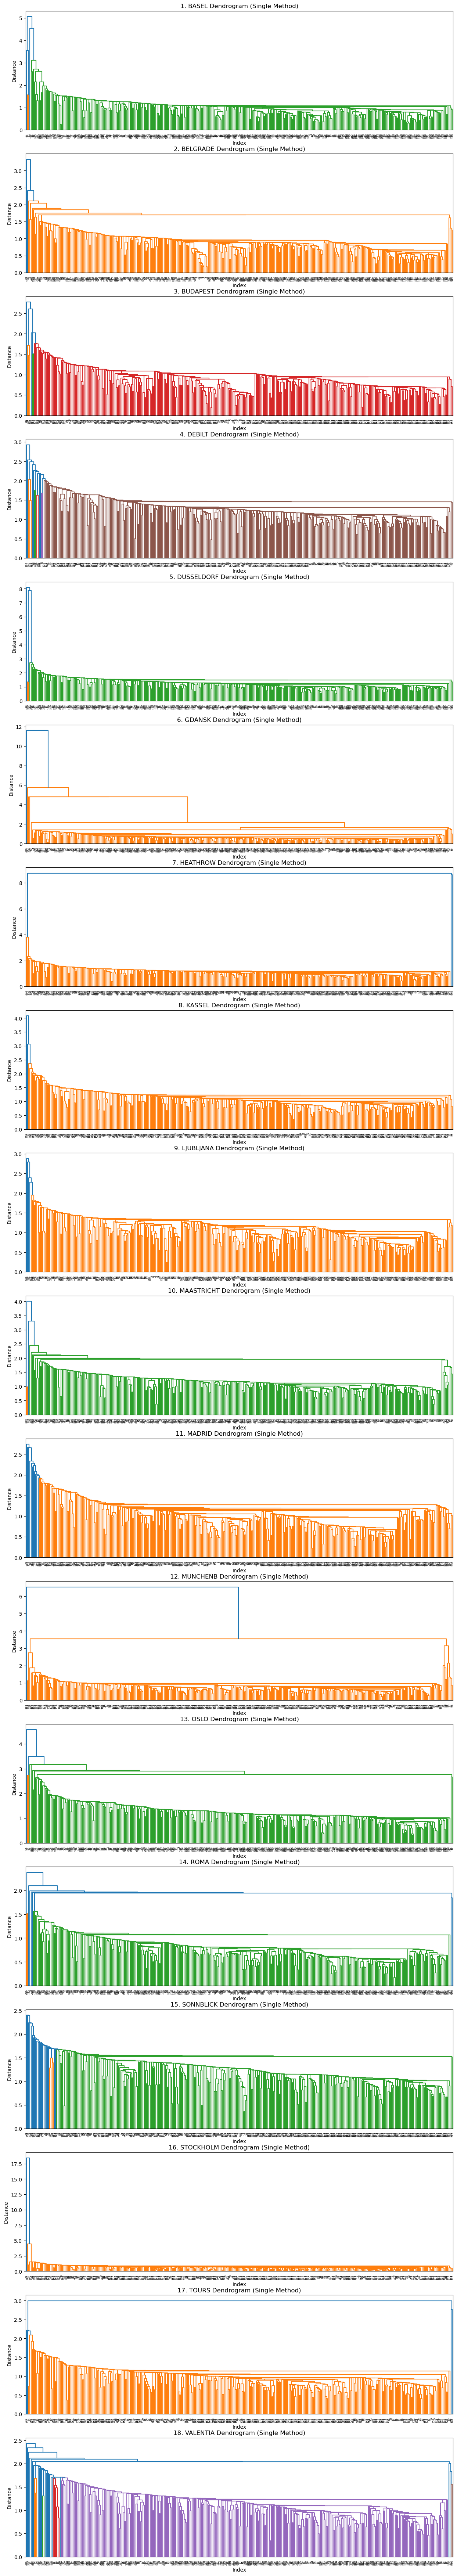

In [13]:
# Dendrogram for clustering by the Single Method

figure, ax = plt.subplots(18, 1, figsize=(15,90))
count=0

for count in range(18):
        station = locations[count] 
        station_columns = [col for col in columns if col.split('_')[0] == station]
        distance_single = linkage(scaled_2000.loc[:, station_columns,], method = "single")
        dendrogram(distance_single, leaf_rotation=90, ax=ax[count])
        ax[count].set_xlabel('Index');
        ax[count].set_ylabel('Distance'); 
        ax[count].set_title(str(count+1) + '. ' + station +' Dendrogram (Single Method)')

### Complete Method

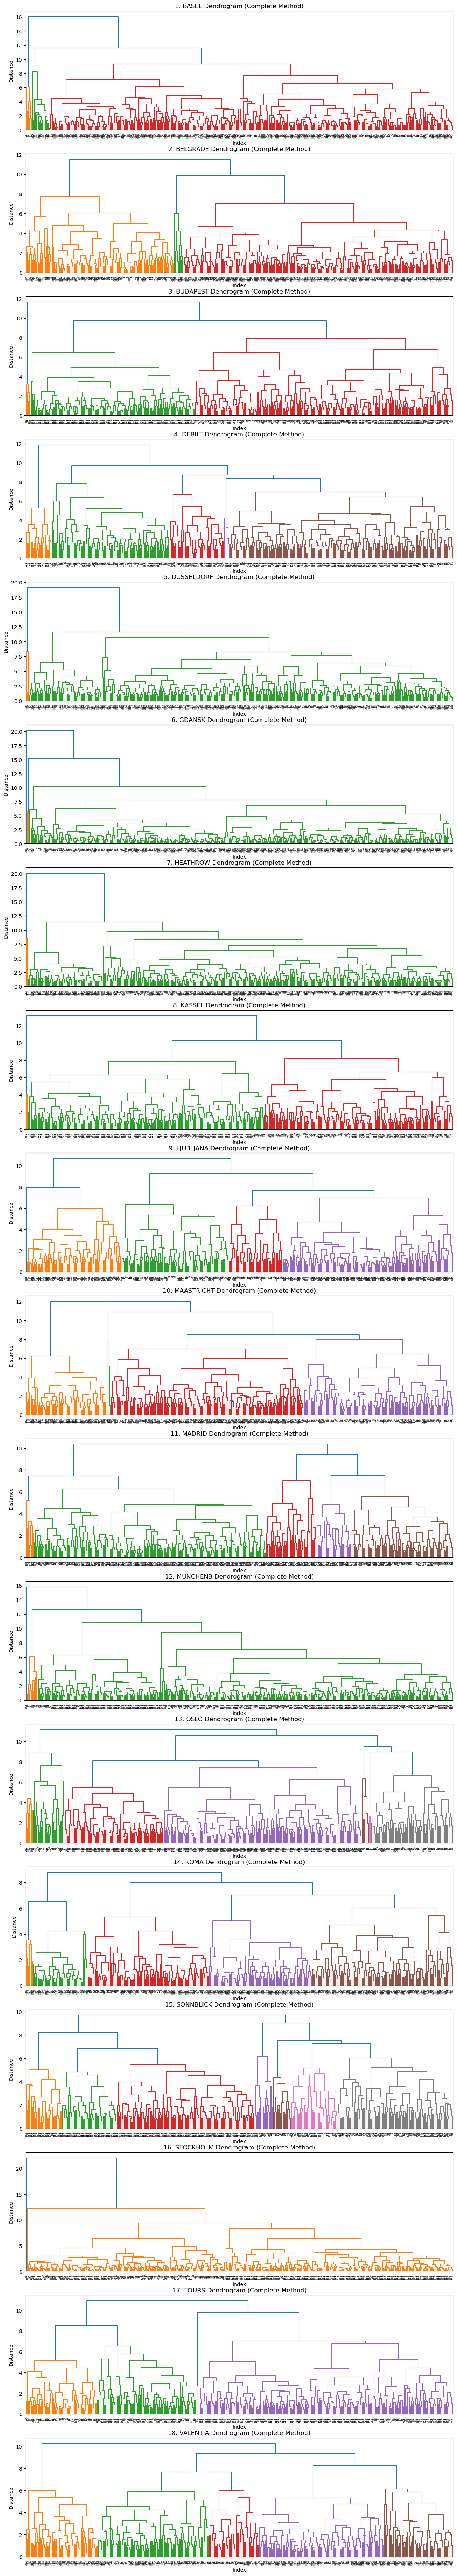

In [14]:
# Dendrogram for clustering by the Complete Method

figure, ax = plt.subplots(18, 1, figsize=(15,90))
count=0

for count in range(18):
        station = locations[count] 
        station_columns = [col for col in columns if col.split('_')[0] == station]
        distance_single = linkage(scaled_2000.loc[:, station_columns,], method = "complete")
        dendrogram(distance_single, leaf_rotation=90, ax=ax[count])
        ax[count].set_xlabel('Index');
        ax[count].set_ylabel('Distance'); 
        ax[count].set_title(str(count+1) + '. ' + station +' Dendrogram (Complete Method)')

### Average Method

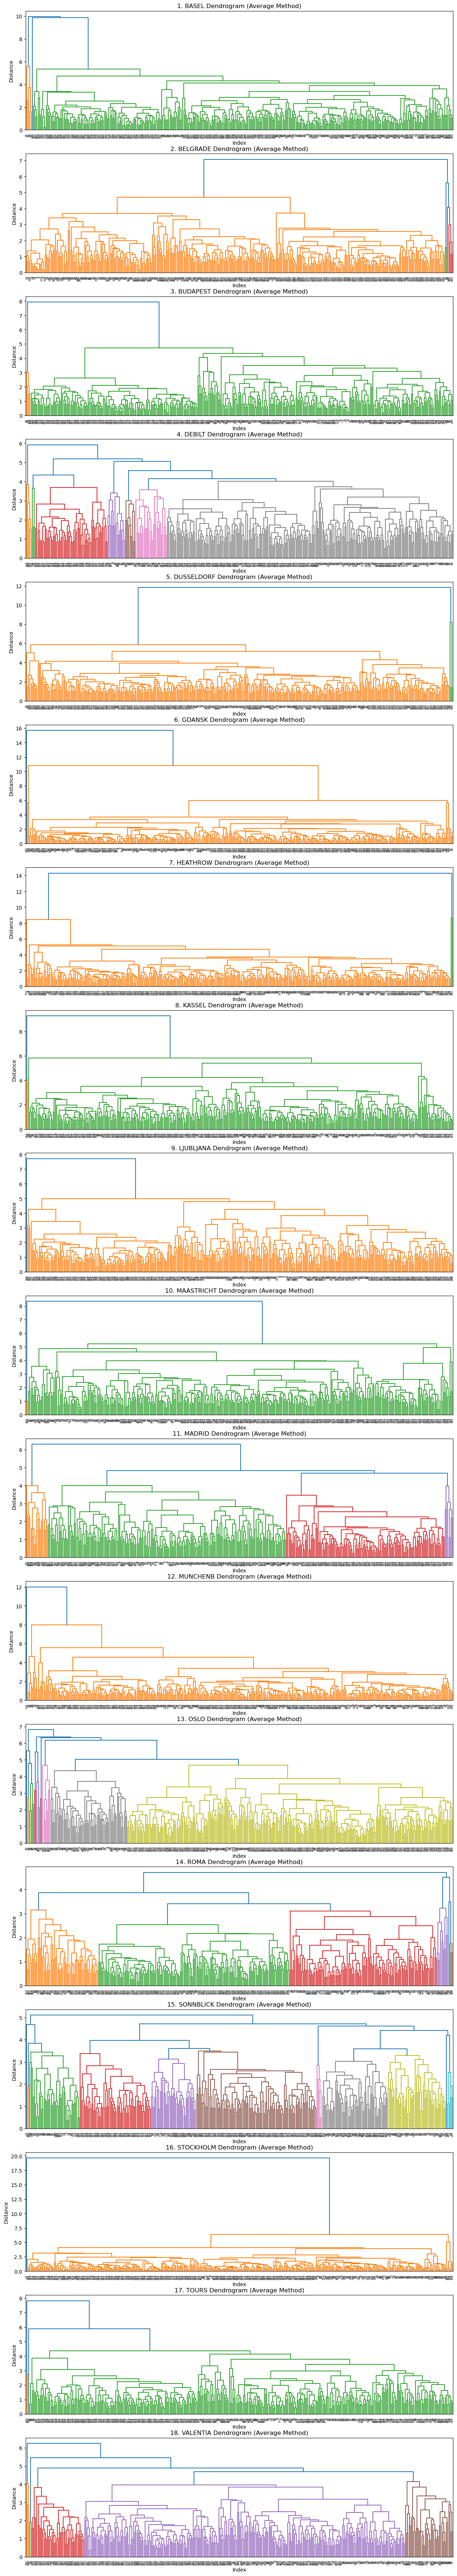

In [15]:
# Dendrogram for clustering by the Average Method

figure, ax = plt.subplots(18, 1, figsize=(15,90))
count=0

for count in range(18):
        station = locations[count] 
        station_columns = [col for col in columns if col.split('_')[0] == station]
        distance_single = linkage(scaled_2000.loc[:, station_columns,], method = "average")
        dendrogram(distance_single, leaf_rotation=90, ax=ax[count])
        ax[count].set_xlabel('Index');
        ax[count].set_ylabel('Distance'); 
        ax[count].set_title(str(count+1) + '. ' + station +' Dendrogram (Average Method)')

### Ward Method

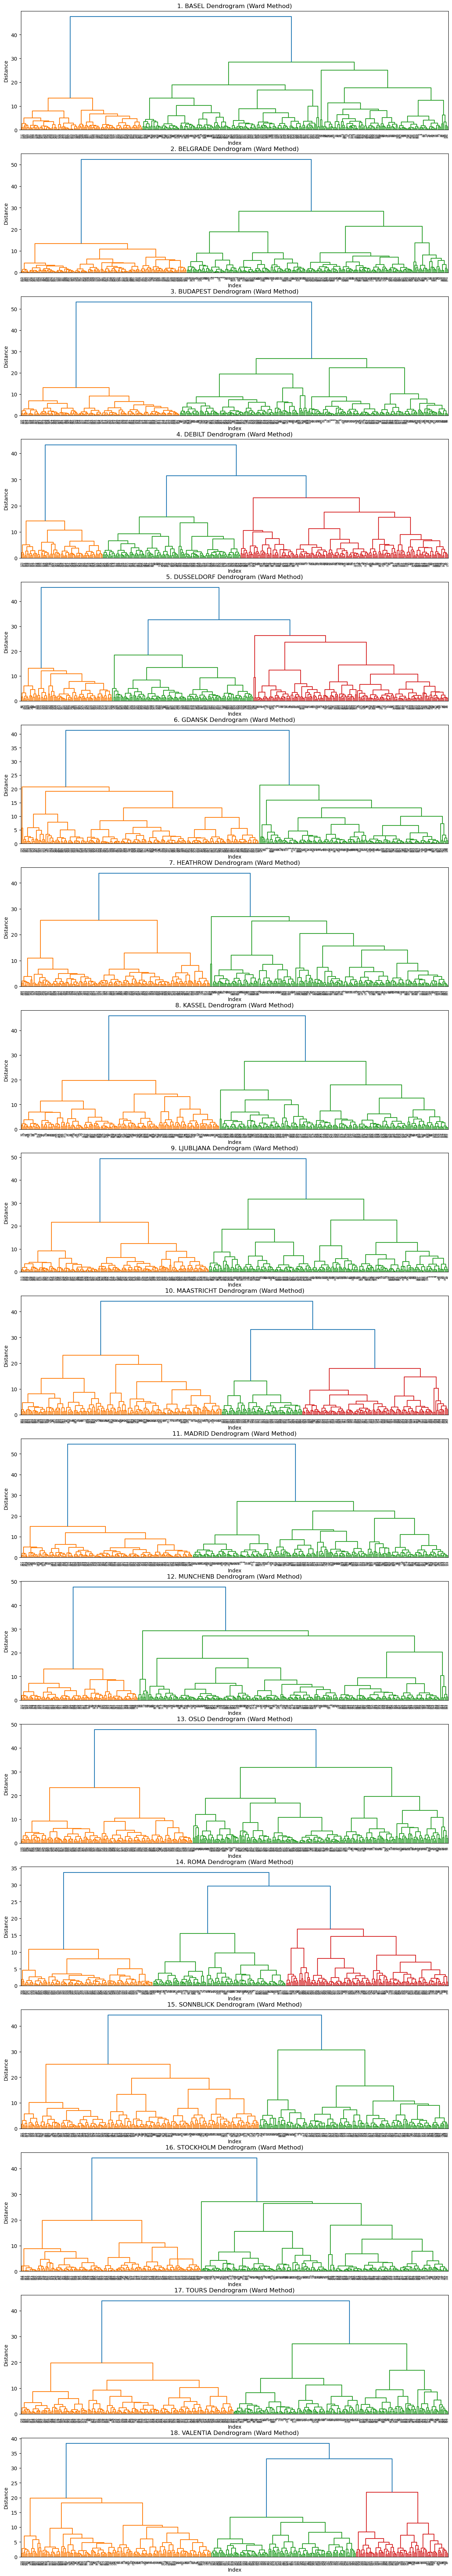

In [16]:
# Dendrogram for clustering by the Ward Method

figure, ax = plt.subplots(18, 1, figsize=(15,90))
count=0

for count in range(18):
        station = locations[count] 
        station_columns = [col for col in columns if col.split('_')[0] == station]
        distance_single = linkage(scaled_2000.loc[:, station_columns,], method = "ward")
        dendrogram(distance_single, leaf_rotation=90, ax=ax[count])
        ax[count].set_xlabel('Index');
        ax[count].set_ylabel('Distance'); 
        ax[count].set_title(str(count+1) + '. ' + station +' Dendrogram (Ward Method)')

### 3.2 - Dendrogram (All Station Together)

In [20]:
# create a station columns list (remove DATE and MONTH)
all_columns = scaled_2000.columns.to_list()
all_station_columns = [col for col in all_columns if col not in ('DATE', 'MONTH')]
# Has been checked (Check removed to save on visual space)

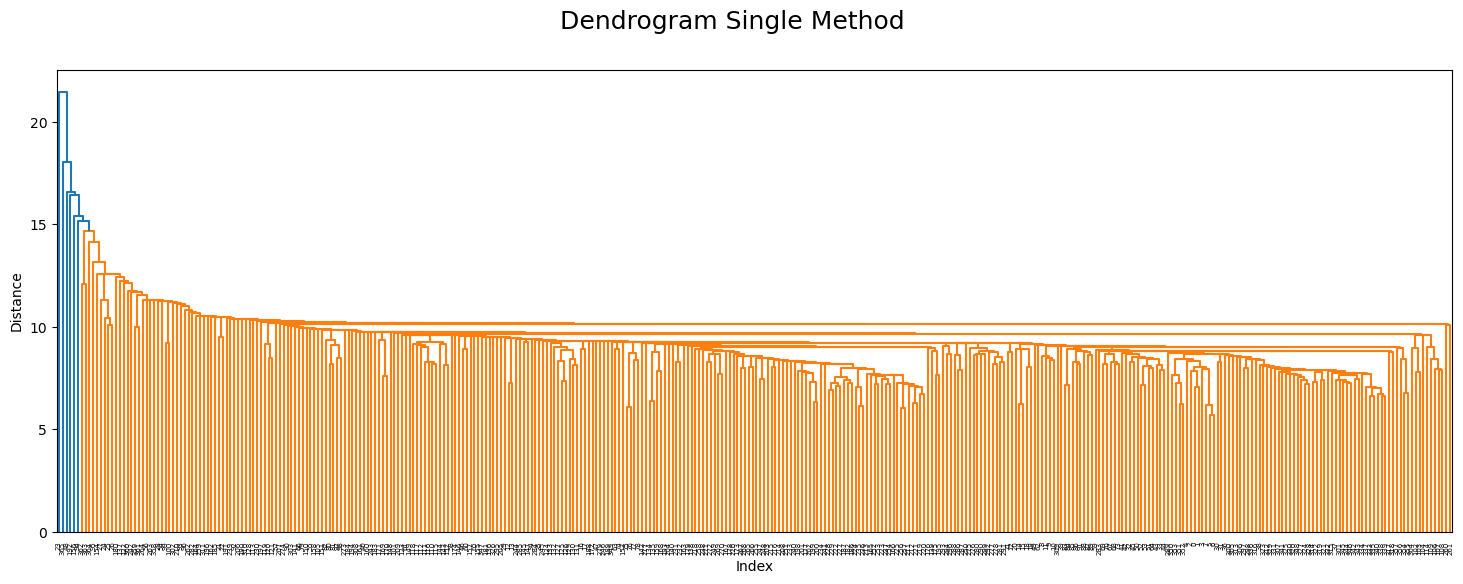

In [21]:
distance_single = linkage(scaled_2000.loc[:, all_station_columns,], method = "single")
plt.figure(figsize=(18,6))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Single Method",fontsize=18)
plt.show()

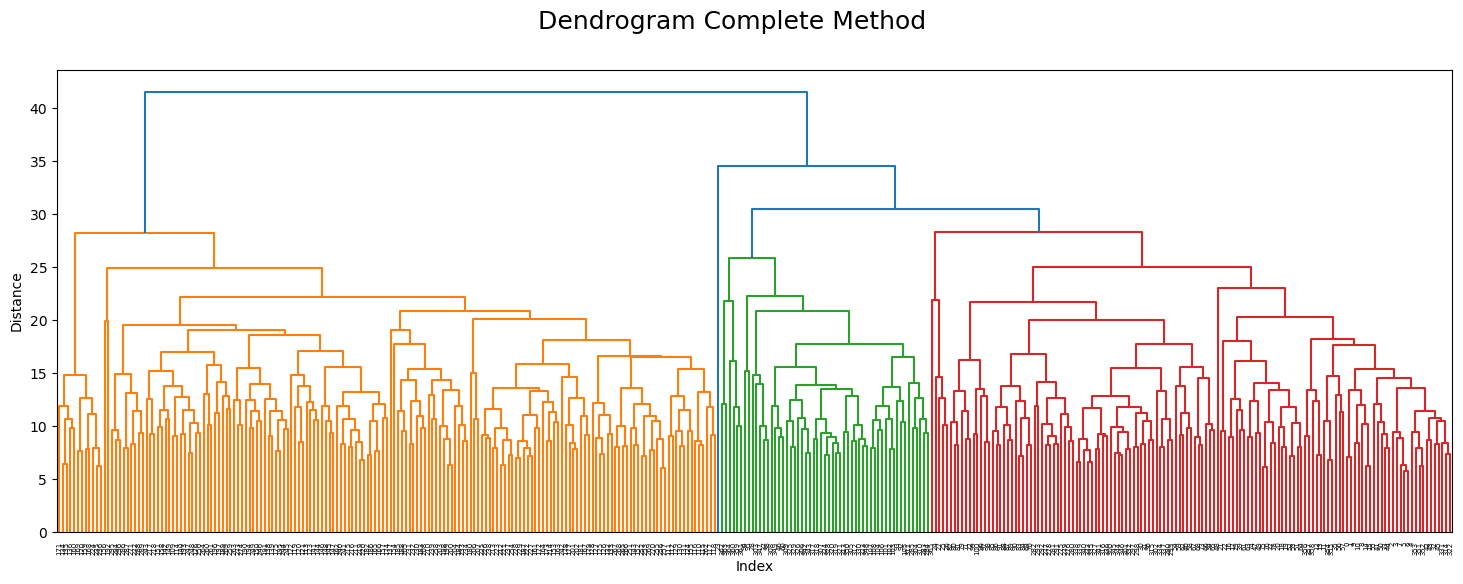

In [22]:
distance_single = linkage(scaled_2000.loc[:, all_station_columns,], method = "complete")
plt.figure(figsize=(18,6))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Complete Method",fontsize=18)
plt.show()

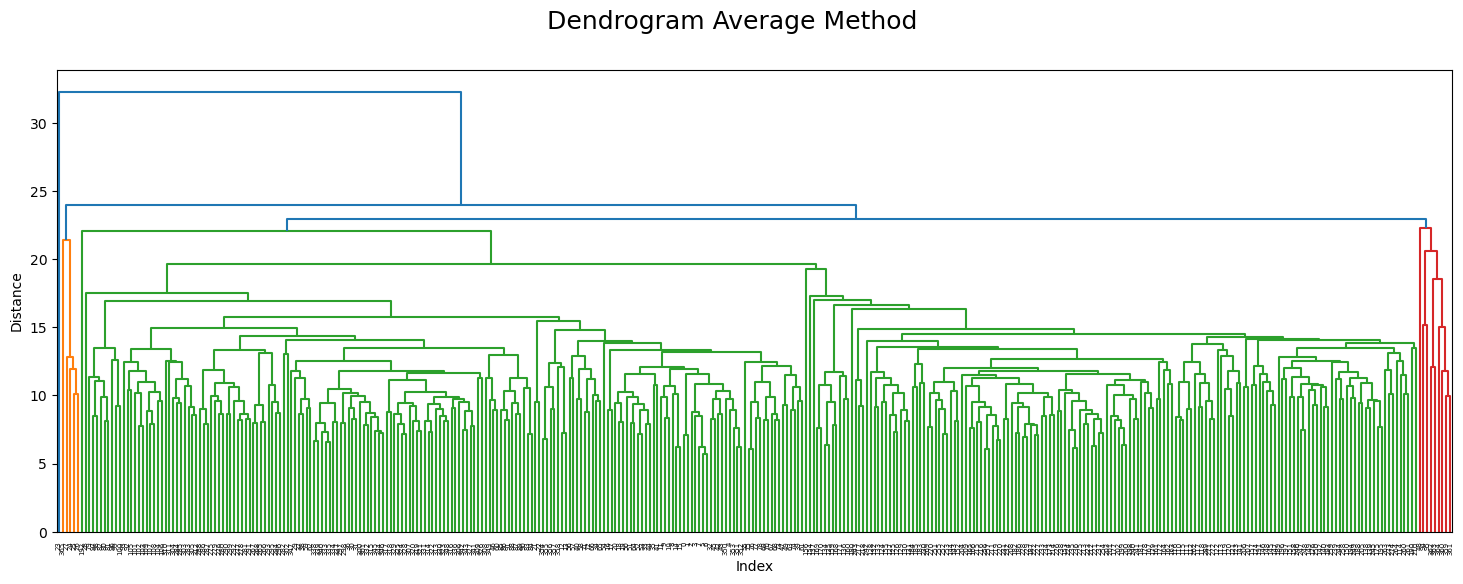

In [23]:
distance_single = linkage(scaled_2000.loc[:, all_station_columns,], method = "average")
plt.figure(figsize=(18,6))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Average Method",fontsize=18)
plt.show()

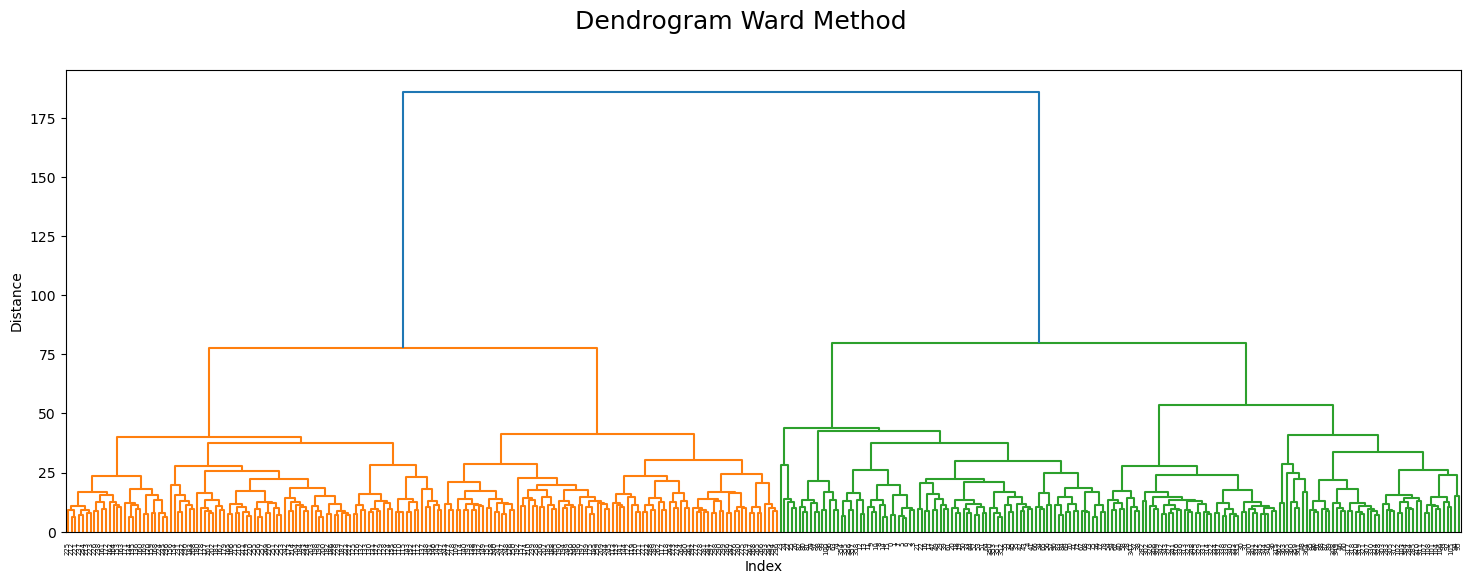

In [24]:
distance_single = linkage(scaled_2000.loc[:, all_station_columns,], method = "ward")
plt.figure(figsize=(18,6))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Ward Method",fontsize=18)
plt.show()

## 4. Principal Component Analysis

In [25]:
# Subset scaled_2000 DataFrame by removing DATE and Month

df1 = scaled_2000[all_station_columns]
df1.head()

BASEL_cloud_cover  BASEL_wind_speed  BASEL_humidity  BASEL_pressure  \
0           1.122068     -4.440892e-16        1.727163        1.285994   
1           1.122068     -4.440892e-16        1.507249        1.662119   
2          -0.161297     -4.440892e-16        0.847508        1.615103   
3           0.694280     -4.440892e-16        0.627595        1.003900   
4          -0.161297     -4.440892e-16        1.837119        0.815837   

   BASEL_global_radiation  BASEL_precipitation  BASEL_snow_depth  \
0               -1.173221            -0.433233         -0.136209   
1               -1.120230            -0.503508         -0.136209   
2               -0.855273            -0.503508         -0.136209   
3               -0.717496             0.316365         -0.136209   
4               -0.844675            -0.339534         -0.136209   

   BASEL_sunshine  BASEL_temp_mean  BASEL_temp_min  ...  VALENTIA_cloud_cover  \
0       -1.084565        -1.378431       -1.117145  ...              0.020165   
1       -1.084565        -1.269852       -0.921366  ...              1.250210   
2       -0.265608        -1.487010       -1.384116  ...             -1.209881   
3        0.442679        -1.223318       -1.312924  ...              0.020165   
4       -0.265608        -0.897580       -0.725588  ...              0.635187   

   VALENTIA_humidity  VALENTIA_pressure  VALENTIA_global_radiation  \
0           0.695379           0.898152                  -1.082658   
1           1.061052           0.427782                  -1.193093   
2          -0.523532           0.241256                  -1.082658   
3          -0.889205          -0.204784                  -0.910870   
4          -0.279750          -1.356379                  -1.205364   

   VALENTIA_precipitation  VALENTIA_snow_depth  VALENTIA_sunshine  \
0               -0.574408                  0.0          -0.783824   
1               -0.100709                  0.0          -0.967839   
2                0.831884                  0.0          -0.652385   
3               -0.219134                  0.0          -0.047764   
4               -0.233937                  0.0          -0.967839   

   VALENTIA_temp_mean  VALENTIA_temp_min  VALENTIA_temp_max  
0           -1.118701          -1.451207          -0.610264  
1           -0.311596          -0.171110          -0.712815  
2           -0.580631          -0.171110          -0.892280  
3           -0.715148          -0.737307          -1.456311  
4           -0.822763          -0.983480          -0.533350  

[5 rows x 168 columns]

In [26]:
# Run the PCA model, reducing to 18 for number of weather stations
pca = PCA(n_components = 18)
principalComponents = pca.fit_transform(df1)

In [27]:
principalComponents

array([[-12.30367003,   3.9844676 ,  -4.65037096, ...,  -0.91855221,
          0.23251268,   0.97734951],
       [-11.27591524,   4.82802132,  -4.95013738, ...,  -0.84987489,
         -0.82566717,   0.82052031],
       [-10.79570343,   3.5939185 ,  -4.65737615, ...,  -0.1702323 ,
         -0.91169363,  -0.86442715],
       ...,
       [-13.19264864,  -6.63584751,   6.39748822, ...,   5.88961996,
         -0.49276502,  -0.45004454],
       [-13.19580542,  -3.36817111,   3.93878837, ...,  -0.28045768,
          0.26713513,  -2.68272063],
       [-13.31689784,   1.61734479,   3.0715544 , ...,  -2.70943785,
         -1.5212537 ,   0.52600439]])

In [28]:
# Make a dataframe of the new components
dfPCA = pd.DataFrame(principalComponents, columns=['PCA1', 'PCA2','PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7', 'PCA8', 'PCA9', 'PCA10', 'PCA11', 'PCA12', 'PCA13', 'PCA14', 'PCA15', 'PCA16', 'PCA17', 'PCA18'])
dfPCA

PCA1      PCA2      PCA3      PCA4      PCA5      PCA6      PCA7  \
0   -12.303670  3.984468 -4.650371 -1.626903 -0.087554  1.439353 -1.826198   
1   -11.275915  4.828021 -4.950137 -0.249943 -1.038258  0.249952 -0.857263   
2   -10.795703  3.593919 -4.657376  2.800168  0.461898 -0.555462  0.453382   
3    -9.744379  2.305812 -3.686662  2.348202  2.362939  1.425954  1.029055   
4   -10.362477  3.885228 -0.191965  2.644560 -3.067238  0.270308  0.628176   
..         ...       ...       ...       ...       ...       ...       ...   
361 -11.870624 -8.194647  5.335100 -2.347469 -0.841473  3.807072 -3.878817   
362 -12.631110 -7.532162  6.400491 -2.044389 -1.351738  0.835748 -4.023749   
363 -13.192649 -6.635848  6.397488 -3.033823 -0.821675  0.091561 -2.248851   
364 -13.195805 -3.368171  3.938788 -3.934247  1.822820  0.547590 -4.354749   
365 -13.316898  1.617345  3.071554 -0.979993 -0.057077  2.075259 -3.581978   

         PCA8      PCA9     PCA10     PCA11     PCA12     PCA13     PCA14  \
0    1.942304  1.901166 -0.850767  2.228672  1.752885  1.487777 -0.507642   
1    0.264164  1.678914 -0.594859  1.329267  1.429538  0.955675 -1.355736   
2   -0.976426 -0.300677 -0.428805  1.823617  0.519961  1.494393  0.786293   
3   -2.934832  0.312609  4.451172  2.081709  0.976015  0.308694  1.114285   
4    0.284416 -0.077673  1.534767  0.492276  0.297664  0.818941 -1.642109   
..        ...       ...       ...       ...       ...       ...       ...   
361 -1.418181  1.924888 -0.257522 -1.384876  0.384699 -0.611195 -1.498553   
362 -1.193028  1.291244  2.150128 -5.133528  1.200224  6.024627 -1.739505   
363 -1.522177 -1.009005  1.797330 -2.274548  2.116254  4.811218 -0.547781   
364 -0.031681  2.953673  3.242879 -1.717557  3.129289  1.599187 -1.607377   
365  3.518442  4.908517  0.549975 -1.276005  4.300488  2.985872  2.883379   

        PCA15     PCA16     PCA17     PCA18  
0    0.825326 -0.918552  0.232513  0.977350  
1    0.443111 -0.849875 -0.825667  0.820520  
2    0.095312 -0.170232 -0.911694 -0.864427  
3    0.402117  1.475583 -0.614444 -1.089527  
4    0.501668  0.143905  0.748378 -0.167533  
..        ...       ...       ...       ...  
361 -0.530841  0.379991 -1.307357 -0.132122  
362  1.456915  6.208486  0.968855 -2.921427  
363  0.597738  5.889620 -0.492765 -0.450045  
364  2.866124 -0.280458  0.267135 -2.682721  
365  5.567210 -2.709438 -1.521254  0.526004  

[366 rows x 18 columns]

In [29]:
# Export PCA dataset
dfPCA.to_csv(os.path.join(path, '02 Data', '2000_PCA.csv'))